<a href="https://colab.research.google.com/github/tsabitanajma/Price-Prediction-with-Deep-Learning/blob/main/Deep_Learning_ANN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARINING ANN

Nama: Tsabita Bahiratu Najma

No: 16

## About Dataset

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates.

Data source: https://www.kaggle.com/datasets/toramky/automobile-dataset

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Celerates DSAI/")

In [ ]:
import pandas as pd
df = pd.read_csv('Automobile_data.csv')
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Check Duplicate Data

In [ ]:
df[df.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## Check and Handle Missing Value

In [ ]:
#Convert the ? entries to nan
df = df.replace('?', float('nan'), inplace=False)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
print("Missing values:\n", df.isna().sum())

Missing values:
 symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [ ]:
# Percentage of missing values
missing_percent = df.isnull().mean() * 100

# Drop column has > 75% missing values
cols_to_drop = missing_percent[missing_percent > 75].index
df = df.drop(columns=cols_to_drop)

# Impute categoric column
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]) if x.isnull().sum() > 0 else x)

#Impute numeric column
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isna().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Feature Engineering

In [ ]:
# Misalnya kita ingin memprediksi 'Price', sesuaikan jika targetnya berbeda
target_column = 'price'  # ganti sesuai kolom targetmu
X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Label Encoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data train test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (164, 25)
Test shape: (41, 25)


## Modeling and Evaluation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ANN model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Callback
checkpoint_cb = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Training model with ModelCheckpoint
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=512,
    callbacks=[checkpoint_cb],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 11187.7705 - mae: 91.4638
Epoch 1: val_loss improved from inf to 12014.66211, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 11187.7705 - mae: 91.4638 - val_loss: 12014.6621 - val_mae: 96.8519
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11156.1855 - mae: 91.2865
Epoch 2: val_loss improved from 12014.66211 to 11989.40820, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 11156.1855 - mae: 91.2865 - val_loss: 11989.4082 - val_mae: 96.7109
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11132.2412 - mae: 91.1514
Epoch 3: val_loss improved from 11989.40820 to 11967.66406, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 11132.2412 - mae: 91.1514 - val_loss: 11967.6641 - val_mae: 96.5908
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11111.8682 - mae: 91.0357
Epoch 4: val_loss improved from 11967.66406 to 11946.

In [ ]:
# Evaluation
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3092.0908 - mae: 46.3717

Test Loss: 3073.9600
Test MAE: 45.9098


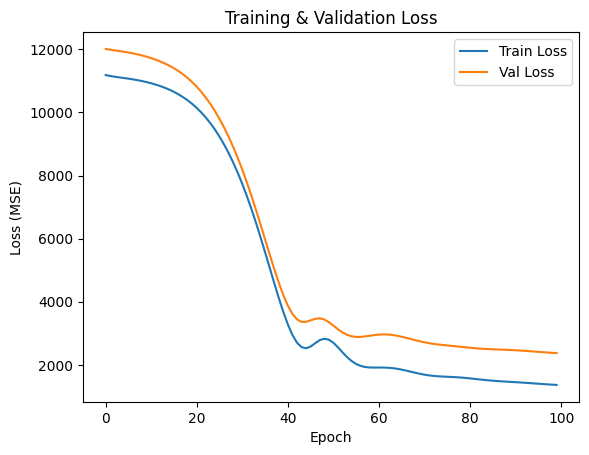

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()